In [1]:
# Imports Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Import Data
data = pd.read_csv("shopping_trends.csv")

In [5]:
# Print First Entire Rows and column
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
# Summary Of this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [9]:
# Some Numerical Data Summary of the Data
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [19]:
# Checking duplicate value in the data
dpl = data.duplicated().sum()
print("\nChecking Duplicate Value")
print(dpl)


Checking Duplicate Value
0


In [21]:
# Checking null values or empty values
null_values = data.isna().sum()
print("\nNull Values")
print(null_values)


Null Values
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


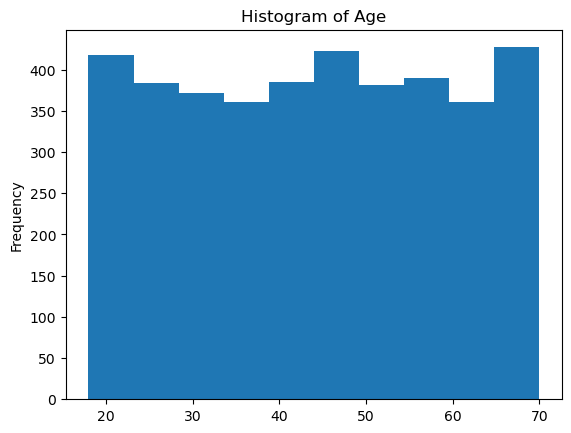

In [25]:
data['Age'].plot(kind = "hist")
plt.title("Histogram of Age")
plt.show()

In [35]:
# Shows data columns
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

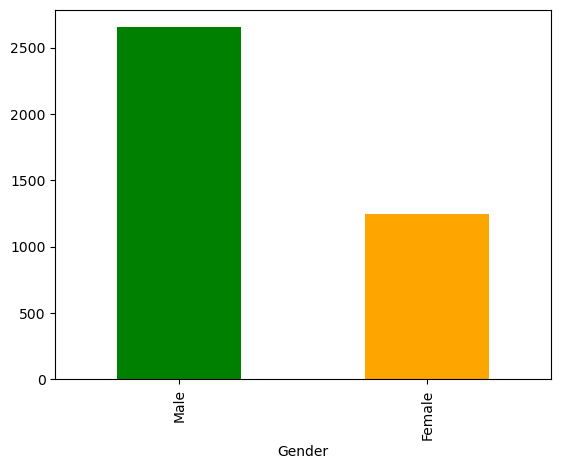

In [33]:
data['Gender'].value_counts().plot(kind = "bar", color=["green","orange"])
plt.show()

In [43]:
# Calculate Category like Total Accessory, Total Cloths Amount etc.
data.groupby("Category")['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(3)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Name: Purchase Amount (USD), dtype: float64

In [49]:
sorting_data = data.sort_values('Review Rating')
print(sorting_data)

      Customer ID  Age  Gender Item Purchased     Category  \
820           821   56    Male       Sneakers     Footwear   
3301         3302   36  Female          Pants     Clothing   
610           611   53    Male         Shorts     Clothing   
767           768   27    Male           Coat    Outerwear   
2008         2009   57    Male          Skirt     Clothing   
...           ...  ...     ...            ...          ...   
3646         3647   69  Female        Jewelry  Accessories   
2256         2257   31    Male         Blouse     Clothing   
2291         2292   28    Male           Coat    Outerwear   
1820         1821   19    Male          Shirt     Clothing   
2434         2435   36    Male         Gloves  Accessories   

      Purchase Amount (USD)      Location Size      Color  Season  \
820                      39     Louisiana    M  Turquoise  Spring   
3301                     58      Oklahoma   XL   Charcoal  Summer   
610                      72      Oklahoma    M  

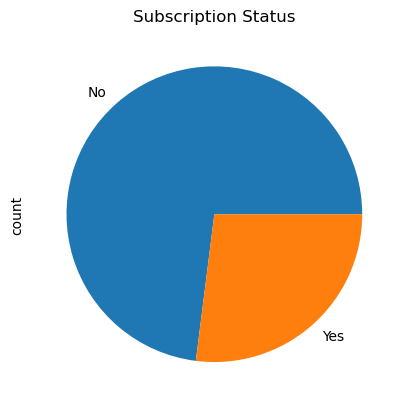

In [63]:
data['Subscription Status'].value_counts().plot(kind = "pie",color=["red","green"])
plt.title("Subscription Status")
plt.show()

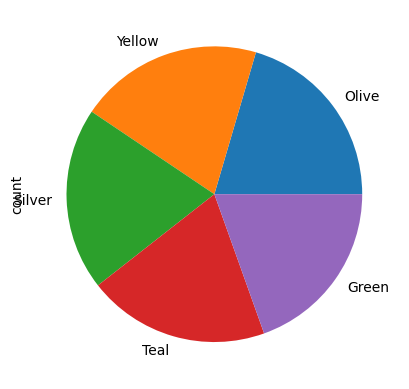

In [81]:
# Checking All Type of color and their counts
clr = data['Color'].value_counts().head().plot(kind="pie")
plt.show()

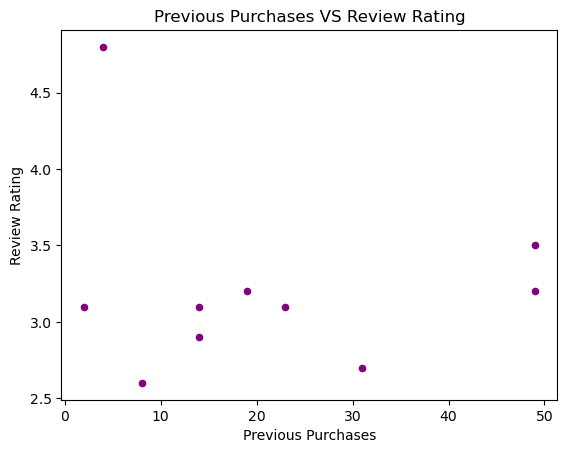

In [103]:
data.head(10).plot(x="Previous Purchases", y="Review Rating", kind="scatter",color=["purple"])
plt.title("Previous Purchases VS Review Rating")
plt.show()

In [107]:
# Group By According season with Purchase Amount (usd).
season = data.groupby("Season")["Purchase Amount (USD)"].sum()
print(season)

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


Text(0.5, 1.0, 'Purchase Amount on the Based on Frequency of purchases')

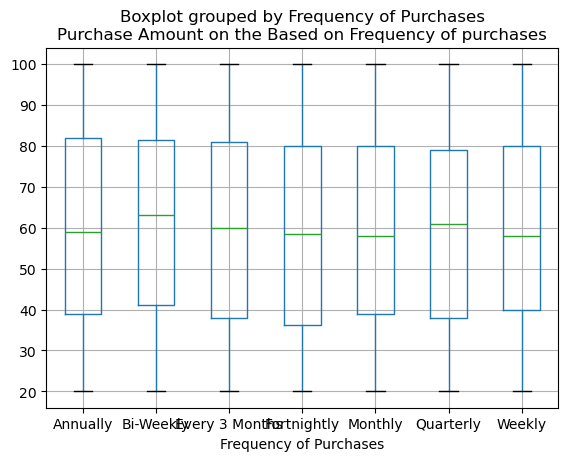

In [109]:
data.boxplot(column = "Purchase Amount (USD)",by = "Frequency of Purchases")
plt.title("Purchase Amount on the Based on Frequency of purchases")


In [117]:
data["Preferred Payment Method"].value_counts().sort_values(ascending=False).head(5)

Preferred Payment Method
PayPal         677
Credit Card    671
Cash           670
Debit Card     636
Venmo          634
Name: count, dtype: int64

In [119]:
data.groupby("Size")["Purchase Amount (USD)"].mean()

Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

In [121]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    37123
Cash             38833
Credit Card      42567
Debit Card       37118
PayPal           37449
Venmo            39991
Name: Purchase Amount (USD), dtype: int64

In [123]:
data.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [129]:
data.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [135]:
data.groupby("Frequency of Purchases")["Previous Purchases"].median()

Frequency of Purchases
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Fortnightly       26.0
Monthly           25.0
Quarterly         28.0
Weekly            26.0
Name: Previous Purchases, dtype: float64

In [137]:
data.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

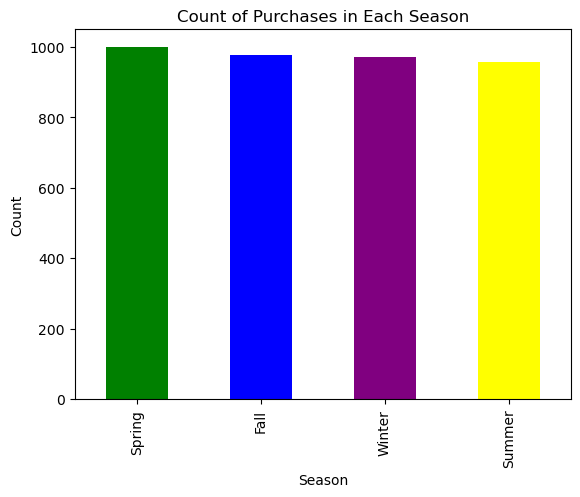

In [147]:
data["Season"].value_counts().plot(kind="bar",color=["green","blue","purple","yellow"])
plt.title("Count of Purchases in Each Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Distribution of Purchases by Category')

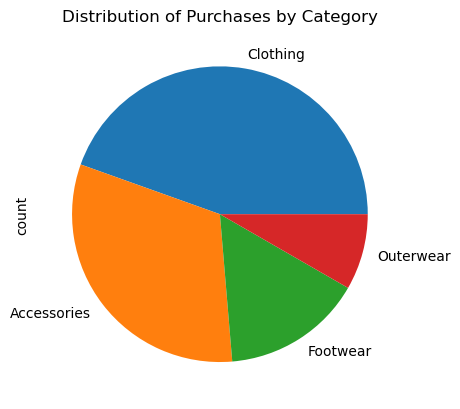

In [151]:
data["Category"].value_counts().plot(kind="pie")
plt.title("Distribution of Purchases by Category")

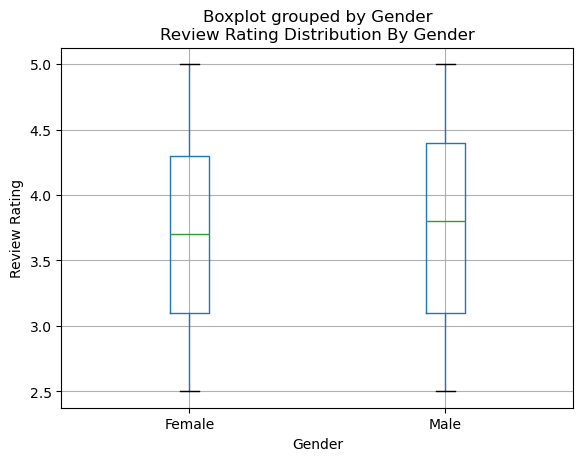

In [161]:
data.boxplot(column="Review Rating", by="Gender")
plt.title("Review Rating Distribution By Gender")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.show()


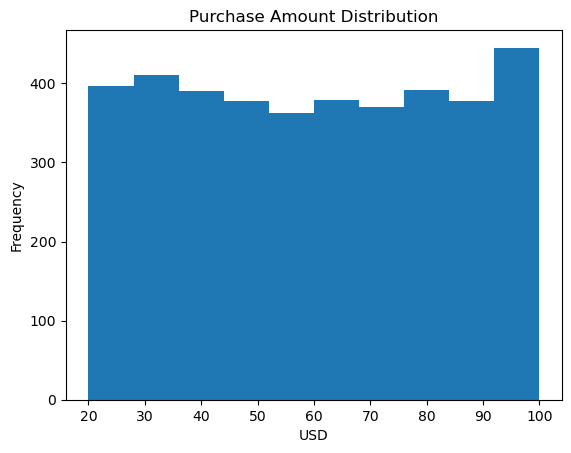

In [167]:
data["Purchase Amount (USD)"].plot(kind="hist",bins=10)
plt.title("Purchase Amount Distribution")
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.show()

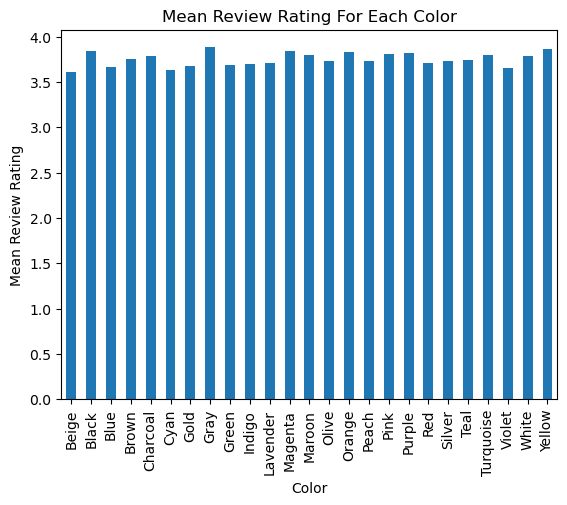

In [171]:
data.groupby("Color")["Review Rating"].mean().plot(kind="bar")
plt.title("Mean Review Rating For Each Color")
plt.xlabel("Color")
plt.ylabel("Mean Review Rating")
plt.show()

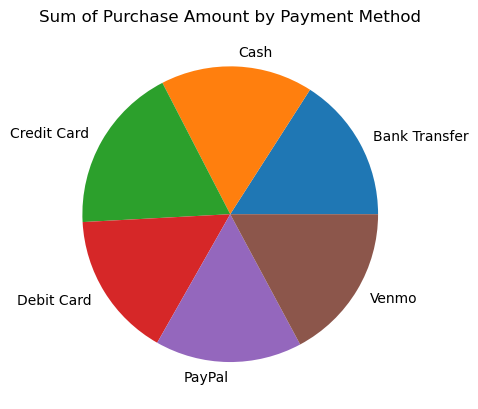

In [179]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind="pie")
plt.title("Sum of Purchase Amount by Payment Method")
plt.ylabel("")
plt.show()

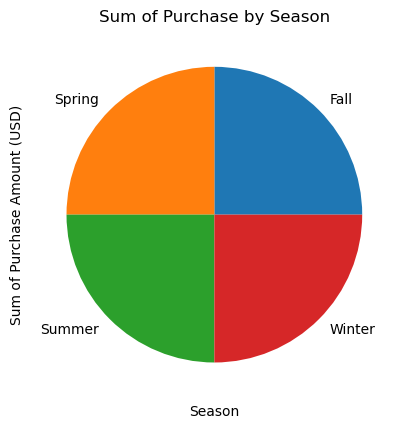

In [183]:
data.groupby("Season")["Purchase Amount (USD)"].max().plot(kind="pie")
plt.title("Sum of Purchase by Season")
plt.xlabel("Season")
plt.ylabel("Sum of Purchase Amount (USD)")
plt.show()